<a href="https://colab.research.google.com/github/yongjuncho123/dust/blob/main/Dust_Job02_EDA_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
finalGD = pd.read_csv('/content/drive/MyDrive/data/totalGD.csv')

In [4]:
finalGD.tail()

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
43819,NaN,111274,강동구,2019123120,0.003,0.5,0.013,0.028,23.0,17.0,서울 강동구 구천면로 42길 59,도시대기
43820,NaN,111274,강동구,2019123121,0.003,0.4,0.015,0.025,25.0,19.0,서울 강동구 구천면로 42길 59,도시대기
43821,NaN,111274,강동구,2019123122,0.003,0.4,0.015,0.023,24.0,17.0,서울 강동구 구천면로 42길 59,도시대기
43822,NaN,111274,강동구,2019123123,0.003,0.5,0.004,0.040,25.0,18.0,서울 강동구 구천면로 42길 59,도시대기
43823,NaN,111274,강동구,2019123124,0.003,0.5,0.005,0.037,27.0,18.0,서울 강동구 구천면로 42길 59,도시대기


In [5]:
dropCol = ['지역', '측정소코드', '주소', '망']
finalGD = finalGD.drop(columns = dropCol)

In [6]:
finalGD.head()

,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,강동구,2016010101,0.004,1.2,0.002,0.050,82.0,44.0
1,강동구,2016010102,0.004,1.2,0.002,0.048,97.0,58.0
2,강동구,2016010103,0.004,1.1,0.002,0.044,88.0,53.0
3,강동구,2016010104,0.004,1.0,0.002,0.041,90.0,52.0
4,강동구,2016010105,0.004,1.0,0.002,0.039,80.0,49.0


In [7]:
finalGD.tail()

,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25
43819,강동구,2019123120,0.003,0.5,0.013,0.028,23.0,17.0
43820,강동구,2019123121,0.003,0.4,0.015,0.025,25.0,19.0
43821,강동구,2019123122,0.003,0.4,0.015,0.023,24.0,17.0
43822,강동구,2019123123,0.003,0.5,0.004,0.040,25.0,18.0
43823,강동구,2019123124,0.003,0.5,0.005,0.037,27.0,18.0


In [8]:
finalGD['Year'] = finalGD['측정일시'] // 1000000  # 새 컬럼에 연도만 추출(측정일시가 int형이라 백으로 나누고 몫만 남기면 됨)
finalGD['Month'] = finalGD['측정일시'] // 10000 % 100 # 월별로
finalGD['Date'] = finalGD['측정일시'] // 100 % 100
finalGD['Hour'] = finalGD['측정일시'] % 100

In [9]:
finalGD.tail()

,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,Year,Month,Date,Hour
43819,강동구,2019123120,0.003,0.5,0.013,0.028,23.0,17.0,2019,12,31,20
43820,강동구,2019123121,0.003,0.4,0.015,0.025,25.0,19.0,2019,12,31,21
43821,강동구,2019123122,0.003,0.4,0.015,0.023,24.0,17.0,2019,12,31,22
43822,강동구,2019123123,0.003,0.5,0.004,0.040,25.0,18.0,2019,12,31,23
43823,강동구,2019123124,0.003,0.5,0.005,0.037,27.0,18.0,2019,12,31,24


In [10]:
TD_GD2016 = finalGD[finalGD['Year'] == 2016] # 2016년 데이터만 보여줌
TD_GD2017 = finalGD[finalGD['Year'] == 2017] # 2016년 데이터만 보여줌
TD_GD2018 = finalGD[finalGD['Year'] == 2018] # 2016년 데이터만 보여줌
TD_GD2019 = finalGD[finalGD['Year'] == 2019] # 2016년 데이터만 보여줌

In [11]:
TD_GD2016.describe()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,Year,Month,Date,Hour
count,8.784000e+03,8659.000000,8645.000000,8592.000000,8660.000000,8784.000000,8784.000000,8784.0,8784.000000,8784.000000,8784.000000
mean,2.016067e+09,0.004237,0.509046,0.019209,0.033178,52.334756,26.884506,2016.0,6.513661,15.756831,12.500000
std,3.453123e+04,0.001097,0.182511,0.016372,0.015833,30.963697,14.888812,0.0,3.451430,8.812031,6.922581
min,2.016010e+09,0.002000,0.200000,0.001000,0.003000,0.000000,0.000000,2016.0,1.000000,1.000000,1.000000
25%,2.016040e+09,0.004000,0.400000,0.005000,0.021000,33.000000,16.000000,2016.0,4.000000,8.000000,6.750000
50%,2.016070e+09,0.004000,0.500000,0.016000,0.031000,47.000000,25.000000,2016.0,7.000000,16.000000,12.500000
75%,2.016100e+09,0.005000,0.600000,0.028000,0.043000,67.000000,35.000000,2016.0,10.000000,23.000000,18.250000
max,2.016123e+09,0.011000,1.800000,0.110000,0.114000,475.000000,101.000000,2016.0,12.000000,31.000000,24.000000


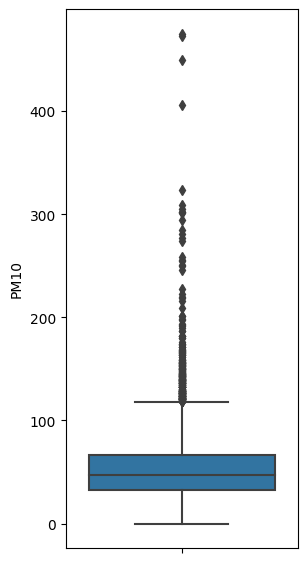

In [30]:
plt.figure(figsize = (3,7))
# 16 - 20 박스 플롯
sns.boxplot(y = TD_GD2016['PM10'])

# axes[0, 0].boxplot([TD_GD2016['PM10'], TD_GD2016['PM25']])
# axes[0, 1].boxplot([TD_GD2017['PM10'], TD_GD2017['PM25']])
# axes[1, 0].boxplot([TD_GD2018['PM10'], TD_GD2018['PM25']])
# axes[1, 1].boxplot([TD_GD2019['PM10'], TD_GD2019['PM25']])

# 범례
plt.show()

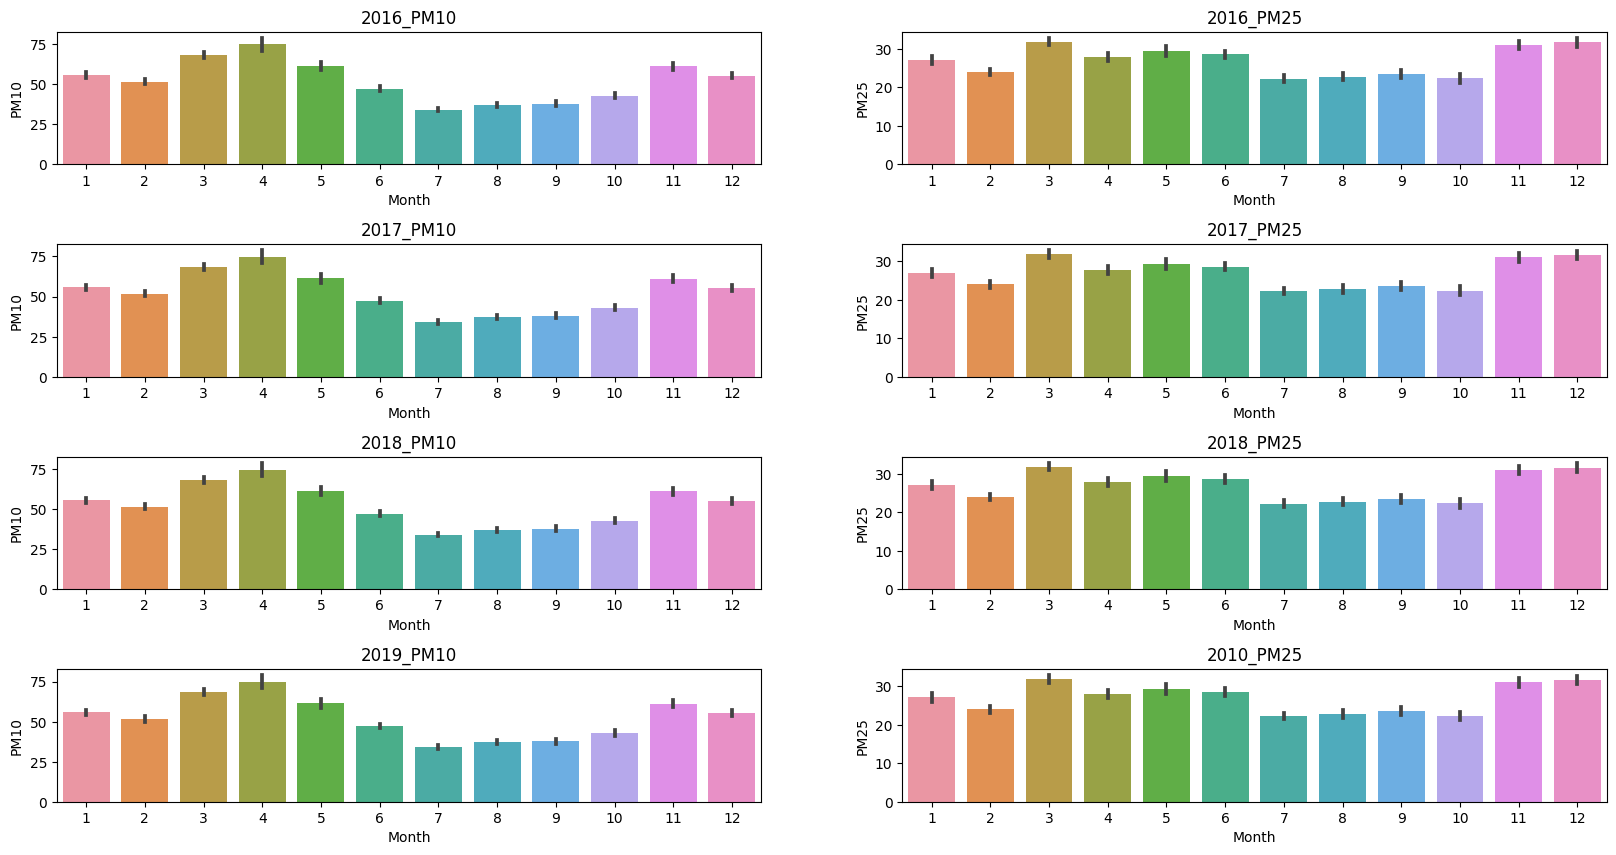

In [13]:
f, axes = plt.subplots(4,2)
f.set_size_inches((20, 10))
sns.barplot(x='Month', y='PM10', data = TD_GD2016, ax = axes[0, 0])
sns.barplot(x='Month', y='PM25', data = TD_GD2016, ax = axes[0, 1])
sns.barplot(x='Month', y='PM10', data = TD_GD2016, ax = axes[1,0])
sns.barplot(x='Month', y='PM25', data = TD_GD2016, ax = axes[1,1])
sns.barplot(x='Month', y='PM10', data = TD_GD2016, ax = axes[2,0])
sns.barplot(x='Month', y='PM25', data = TD_GD2016, ax = axes[2,1])
sns.barplot(x='Month', y='PM10', data = TD_GD2016, ax = axes[3,0])
sns.barplot(x='Month', y='PM25', data = TD_GD2016, ax = axes[3,1])
axes[0, 0].set_title("2016_PM10")
axes[0, 1].set_title("2016_PM25")
axes[1, 0].set_title("2017_PM10")
axes[1, 1].set_title("2017_PM25")
axes[2, 0].set_title("2018_PM10")
axes[2, 1].set_title("2018_PM25")
axes[3, 0].set_title("2019_PM10")
axes[3, 1].set_title("2010_PM25")
plt.subplots_adjust(wspace = 0.2, hspace = 0.6)

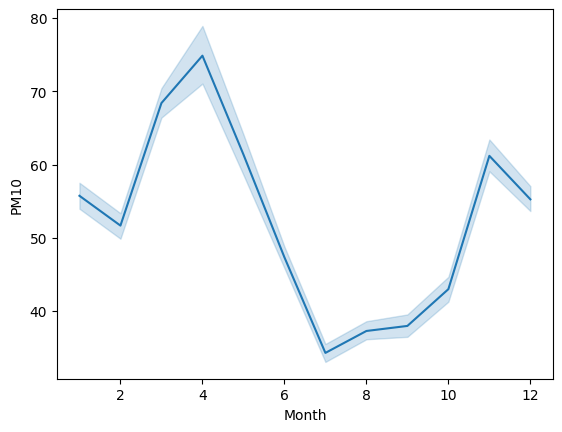

In [ ]:
sns.lineplot(x=T'Month', y='PM10', data = D_GD2016)
plt.show()